In [1]:
import tensorflow as tf

import sys

print(sys.version)
print(tf.__version__)



3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
2.10.0


In [2]:
# 실행가능한 gpu 목록
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#실행가능한 cpu, gpu 목록
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6807010896414794874
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1382701056
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11104189441074511683
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [4]:
# 상수 선언

hello = tf.constant('Hello World')

print(hello)

print(hello.numpy()) #바이트 배열

print(hello.numpy().decode('utf-8')) # 바이트 배열을 스트링으로 변환

a = tf.constant(10)

b = tf.constant(32)

c = tf.add(a, b)  

#c = a+b

print(c.numpy())

print([a.numpy(),b.numpy(),c.numpy()])

# utf-8 3bite
# euc-kr 2bite
# 한국어는 utf-8(3bite)

#tf.Tensor(b'Hello', shape=(), dtype=string)

tf.Tensor(b'Hello World', shape=(), dtype=string)
b'Hello World'
Hello World
42
[10, 32, 42]


In [5]:
node1=tf.constant(3.0)

node2=tf.constant(4.0)

node3=tf.add(node1,node2)

print(node3.numpy())

7.0


In [6]:
def output(a,b):
        return tf.multiply(a, b)

print(output(3.0, 5.0).numpy())

print(output(0.0, 6.0).numpy())

print(output([2.0,3.1,7.4], [6.0,2.5,3.1]).numpy())

15.0
0.0
[12.    7.75 22.94]


In [7]:
#텐서플로의 변수 선언

W = tf.Variable([0.3], dtype=tf.float32)

b = tf.Variable([-0.3], dtype=tf.float32)

def linear_model(x):

    return tf.multiply(W,tf.add(x,b))

x=[1.,2.,3.,4.]

# x의 값에 따라 linear_model 계산

linear_model(x).numpy()

array([0.21000001, 0.51000005, 0.81000006, 1.11      ], dtype=float32)

In [8]:
import numpy as np

X = np.array([[1,2,3],[4,5,6]])

print(X.shape)

print('X\n',X)



W = np.array([[np.random.randint(10) for col in range(2)] for row in range(3)])

print(W.shape)

print('W\n',W)

b = np.array([[np.random.randint(10) for col in range(1)] for row in range(2)])

print(b.shape)

print('b\n',b)

(2, 3)
X
 [[1 2 3]
 [4 5 6]]
(3, 2)
W
 [[3 3]
 [2 6]
 [2 4]]
(2, 1)
b
 [[9]
 [6]]


In [9]:
def expr(X):

    return tf.matmul(X, W) +b #행렬 곱셈

expr(X).numpy()



array([[22, 36],
       [40, 72]])

### 회귀분석

In [10]:
import numpy as np

np.random.seed(7)

#데이터 로딩, 시작36행은 건너뜀

data=np.genfromtxt("./DATA/x09.txt",skip_header=36)

data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

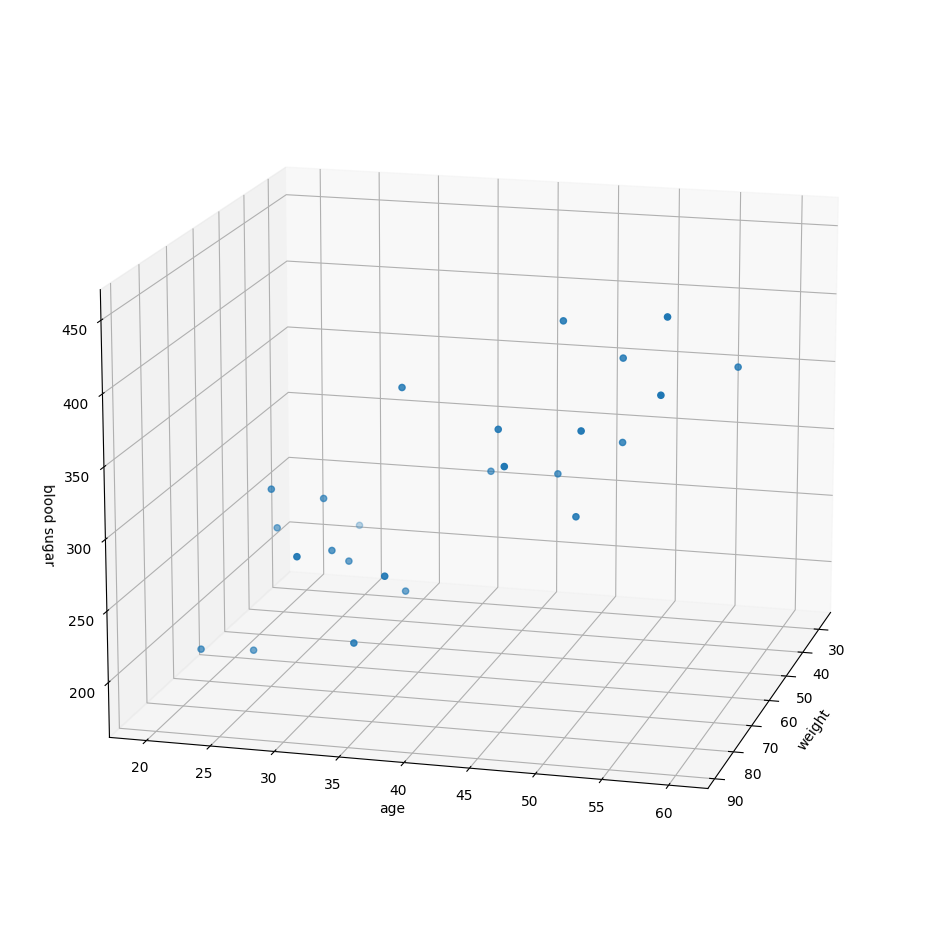

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# set x,y,z
xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)

# plot x,y,x
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15) #출력 각도 설정
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

#데이터를 케라스에 맞게 변환

#독립변수
x_data=np.array(data[:,2:4],dtype=np.float32)

#종속변수
y_data=np.array(data[:,4],dtype=np.float32)

In [13]:
#회귀분석 모델 생성

model=Sequential()
model.add(Dense(1,input_shape=(2,)))

#손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)
#최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수
#손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표
#손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정
#평균제곱오차(Meam Squared Error, MSE), 회귀분석에서 많이 사용하는 손실함수

# https://keras.io/ko/optimizers/  옵티마이저 참조

rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01

model.compile(loss='mse',optimizer=rmsprop)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [14]:
# !pip install graphviz
# !pip install pydot
# !pip install pydotplus

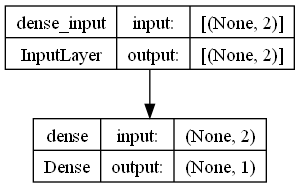

In [15]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [16]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 720ms/step - loss: 101611.4297
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 99424.1562
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 97860.9375
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 96565.9531
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 95426.5469
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 94390.5625
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 93428.9375
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 92523.6562
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 91662.6172
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 90837.3438
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 90041.5234
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 89270.468

In [17]:
hist.history.keys()

dict_keys(['loss'])

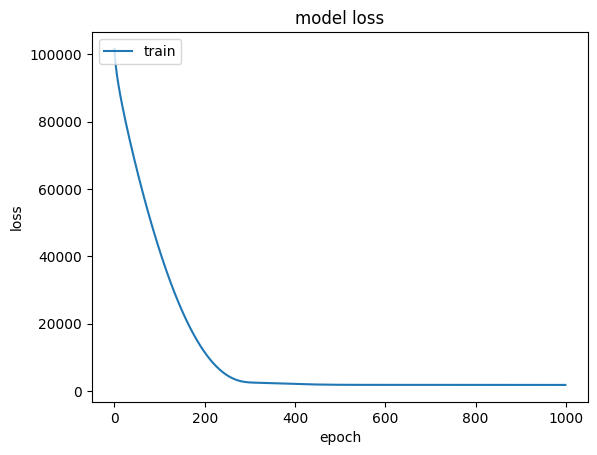

In [18]:
plt.plot(hist.history["loss"])

plt.title("model loss")

plt.ylabel("loss")

plt.xlabel("epoch")

plt.legend(["train"],loc="upper left")

plt.show()

In [19]:
#새로운 데이터로 예측

#체중 100kg, 40세

#1차원 배열을 1행 2열의 2차원 배열로 변환

model.predict(np.array([100,40]).reshape(1,2))

1/1 [==============================] - 0s 70ms/step


array([[351.928]], dtype=float32)

In [20]:
#체중 60kg, 25세

model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 20ms/step


array([[220.45221]], dtype=float32)

In [21]:
#회귀선을 그리기 위한 작업

#가중치와 절편,편향(bias)

w, b =model.get_weights()

w, b

(array([[1.2042841],
        [5.5536284]], dtype=float32),
 array([9.354456], dtype=float32))

In [22]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

x=np.linspace(20,100,50).reshape(50,1)

y=np.linspace(10,70,50).reshape(50,1)

x2=np.concatenate((x,y),axis=1) #x,y연결


#행렬곱셈
z=np.matmul(x2,w)+b
#z2 = model.predict(x2.reshape(1,2))

#print(x2.shape())

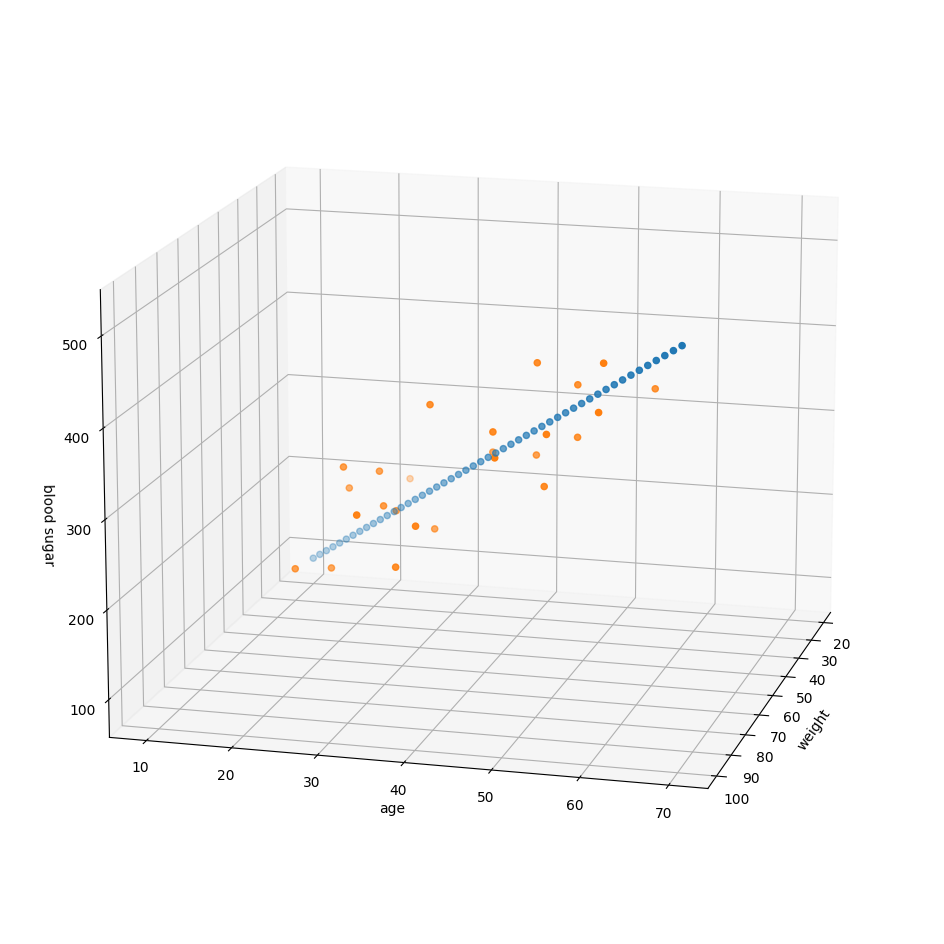

In [23]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(111,projection='3d')

#회귀선

ax.scatter(x,y,z)

#산점도

ax.scatter(xdata,ydata,zdata)

ax.set_xlabel("weight")

ax.set_ylabel("age")

ax.set_zlabel("blood sugar")

ax.view_init(15,15)

plt.show()

### 회귀분석2

In [24]:
#!pip install open

In [25]:
# 주택 가격 예측: 회귀분석

#회귀분석 : 연속적인 값을 예측

# 예) 과거 기상 데이터를 입력하여 내일의 기온을 예측

# 보스턴 주택 가격 데이터셋

# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로

#   주택 가격 예측

# 샘플 개수 : 506개(학습용 404개, 검증용 102개)

from keras.datasets import boston_housing

# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [26]:
#학습용 404개, 검증용 102개, 13개의 변수

print(X_train.shape)

print(X_train.shape[1])

(404, 13)
13


In [27]:
X_test.shape

(102, 13)

In [28]:
# 독립 변수 목록

# 1. Per capita crime rate.

# 2. Proportion of residential land zoned for lots over 25,000

#    square feet.

# 3. Proportion of non-retail business acres per town.

# 4. Charles River dummy variable (= 1 if tract bounds river;

#    0 otherwise).

# 5. Nitric oxides concentration (parts per 10 million).

# 6. Average number of rooms per dwelling.

# 7. Proportion of owner-occupied units built prior to 1940.

# 8. Weighted distances to five Boston employment centres.

# 9. Index of accessibility to radial highways.

# 10. Full-value property-tax rate per $10,000.

# 11. Pupil-teacher ratio by town.

# 12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of

#     Black people by town.

# 13. % lower status of the population.

# 종속변수 : 주택의 가격(천달러 단위)

#주택가격(10000~50000달러, 1970년대 중반 가격)

y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

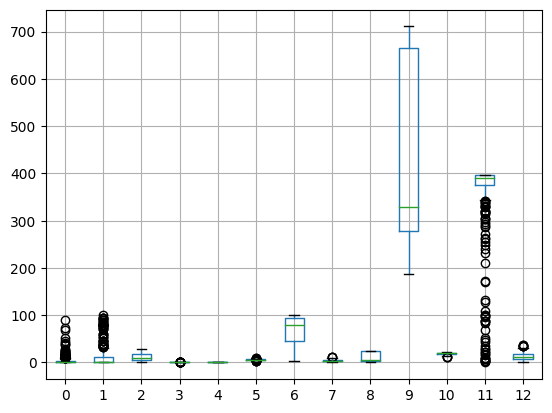

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.DataFrame(X_train).boxplot()

plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)



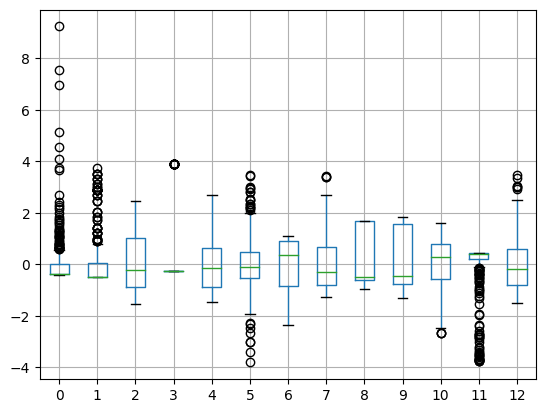

In [31]:
pd.DataFrame(X_train_scaled).boxplot()

plt.show()

In [32]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수

# input data -> {activation function} -> output data

# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수,

#    ReLU 함수

# 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서

#    최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음

from keras import models, layers

#64개의 노드를 가진 은닉층 2개의 신경망

def build_model():

    model = models.Sequential()

    #relu

    model.add(layers.Dense(64, activation='relu',

                           input_shape=(X_train.shape[1],)))

    model.add(layers.Dense(64, activation='relu'))

    #출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우

    #   활성화 함수가 없는 선형층을 사용함)

    model.add(layers.Dense(1))

    #mse 손실 함수를 사용하여 컴파일

    #mse : 평균 제곱 오차(mean squared error) -

    #  예측값과 실제값의 거리의 제곱

    #mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값

    #metrics 평가지표, 검증용 데이터셋으로 평가하는 기준

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model



model = build_model()

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                896       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


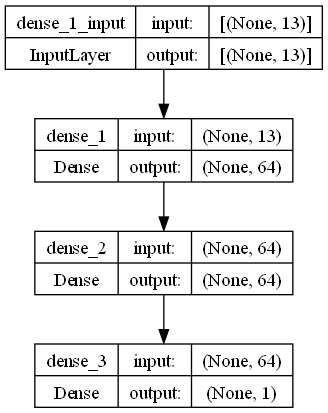

In [33]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [34]:
import matplotlib.pyplot as plt

def train(x_train, y_train, epochs=21):

    for epoch in np.arange(1, epochs):

      hist=model.fit(x_train, y_train)

      plt.plot(y_train, c='r', label='real')

      plt.plot(model.predict(x_train), c='b', label='pred')

      plt.legend()

      mae=hist.history['mae'][0]

      plt.title(f"Epoch {epoch:02d}, mae {mae:.2f}")

      plt.savefig(f"./img/plot_{epoch:02d}.png")

      plt.clf()

In [35]:
# 훈련 이미지 생성
train(X_train_scaled, y_train)

13/13 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

In [36]:
#!pip install opencv-python
#!pip install glob2

In [37]:
import cv2
import glob

img_array=[]

for filename in  sorted(glob.glob('./img/*.png')):

    img=cv2.imread(filename)

    height,width,layers=img.shape

    size=(width,height)

    img_array.append(img)

out=cv2.VideoWriter('model.mp4', cv2.VideoWriter_fourcc(*'H264'), 0.5, size)

for i in range(len(img_array)):

    out.write(img_array[i])

out.release()

In [38]:
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: 12.9274 - mae: 2.5637
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 12.7454 - mae: 2.5277
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 12.3361 - mae: 2.4797
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 11.9282 - mae: 2.4297
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 11.7724 - mae: 2.4491
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 11.4517 - mae: 2.3956
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 11.6915 - mae: 2.4458
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 11.0778 - mae: 2.3723
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 11.1368 - mae: 2.3710
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 10.7813 - mae: 2.3442
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - lo

In [39]:
# 검증용 데이터로 모델 평가

mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)

print(mse)

print(mae) 

4/4 [==============================] - 0s 3ms/step - loss: 19.9396 - mae: 2.7313
19.93961524963379
2.731333017349243


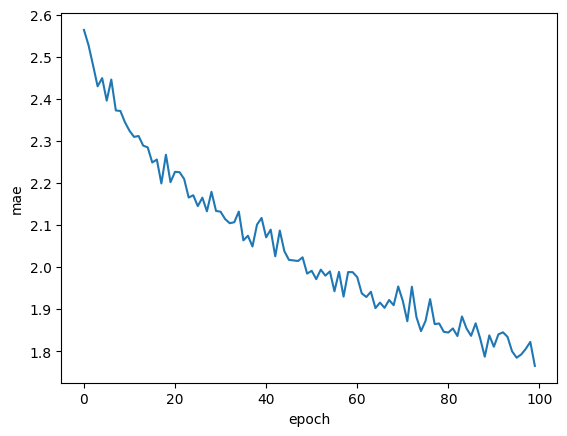

In [40]:
plt.plot(hist.history["mae"])

plt.ylabel("mae")

plt.xlabel("epoch")

plt.show()

### iris

In [41]:
import seaborn as sns

#붓꽃 데이터셋 로딩

iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
#품종 확인

iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder

import pandas as pd

X=iris.iloc[:, :4].values # 독립변수

y=iris.iloc[:,4].values  #종속변수

print(y[:5])

encoder=LabelEncoder() #문자열에 label을 붙임

y1=encoder.fit_transform(y)

print(y1[:5])

y2=pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리

print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [44]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y,random_state=10)

In [45]:
from keras.models import Sequential

from keras.layers import Dense

from keras.optimizers import SGD

#모델 생성

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

sgd = SGD(learning_rate=0.01)  

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                320       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


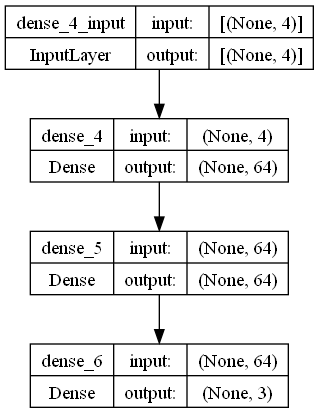

In [47]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [48]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# early stopping
es = EarlyStopping(monitor='val_loss', patience=10)

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("./MODL/iris_best.h5", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) #기존 학습률*factor (배수)

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("./DATA/mylog.csv")  

hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/100
3/3 [==============================] - 0s 92ms/step - loss: 1.0150 - accuracy: 0.4896 - val_loss: 1.0259 - val_accuracy: 0.2083 - lr: 0.0100
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.9548 - accuracy: 0.4896 - val_loss: 0.9777 - val_accuracy: 0.3750 - lr: 0.0100
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.9214 - accuracy: 0.5938 - val_loss: 0.9403 - val_accuracy: 0.7917 - lr: 0.0100
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.8909 - accuracy: 0.8958 - val_loss: 0.9079 - val_accuracy: 0.9583 - lr: 0.0100
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.8861 - accuracy: 0.7396 - val_loss: 0.8740 - val_accuracy: 0.9167 - lr: 0.0100
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.8577 - accuracy: 0.6458 - val_loss: 0.8710 - val_accuracy: 0.7083 - lr: 0.0100
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.8410 - a

In [49]:
from keras.models import load_model

model=load_model('./MODL/iris_best.h5')  

model.evaluate(X_test, y_test, verbose=0)

[0.3087545335292816, 0.8999999761581421]

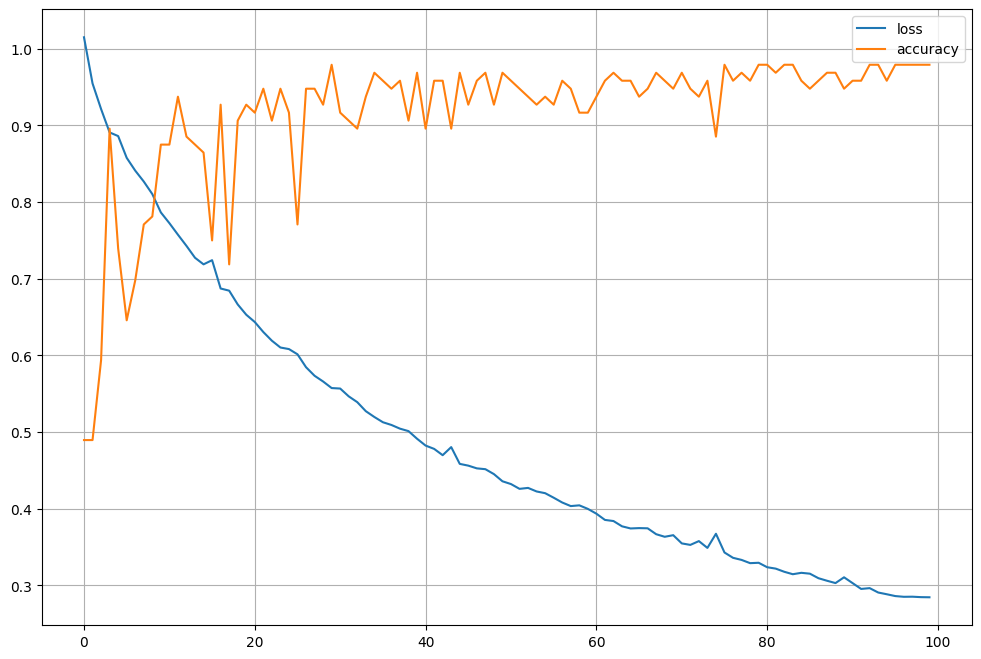

In [50]:
import matplotlib.pyplot as plt

#그래프 출력

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss']) #손실률

plt.plot(hist.history['accuracy']) #정확도

plt.legend(['loss','accuracy'])

plt.grid()

plt.show()

In [51]:
#모델 평가

loss, accuracy = model.evaluate(X_test, y_test,  verbose=0)

print("정확도 = {:.2f}".format(accuracy))

정확도 = 0.90


In [52]:
import numpy as np

from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)

print(pred[:10])

y_test_class = np.argmax(y_test,axis=1)

pred_class = np.argmax(pred,axis=1)

print(y_test_class[:10])

print(pred_class[:10])

print(confusion_matrix(y_test_class,pred_class))

1/1 [==============================] - 0s 46ms/step
[[1.56425945e-02 4.43553925e-01 5.40803552e-01]
 [9.14295971e-01 8.17893222e-02 3.91465286e-03]
 [1.25100901e-02 3.43563527e-01 6.43926382e-01]
 [8.25732574e-03 3.57416689e-01 6.34325922e-01]
 [8.41152444e-02 6.48695648e-01 2.67189085e-01]
 [4.10739472e-03 2.70667076e-01 7.25225508e-01]
 [8.87157023e-01 1.06935374e-01 5.90761472e-03]
 [2.23117578e-03 1.60438478e-01 8.37330341e-01]
 [2.05303566e-03 1.51278049e-01 8.46668959e-01]
 [9.71889853e-01 2.74955686e-02 6.14482269e-04]]
[1 0 1 2 1 2 0 2 2 0]
[2 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]


In [55]:
model.save('./MODL/iris.h5')

### tf-gpu

In [4]:
#기본적으로 gpu로 실행됨

tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)

print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
tf.debugging.set_log_device_placement(True)

#cpu에서 실행시키는 방법

with tf.device('/CPU:0'):

    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

    c = tf.matmul(a, b)

    print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [6]:
tf.debugging.set_log_device_placement(True)

#gpu에서 실행시키는 방법

with tf.device('/GPU:0'):

    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

    c = tf.matmul(a, b)

    print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [1]:
# gpu memory는 기본적으로 full size로 설정됨

# gpu 메모리를 탄력적으로 사용하는 방법

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

print(gpus)

#gpu의 메모리를 점진적으로 늘리도록 설정

tf.config.experimental.set_memory_growth(gpus[0],True)

#메모리 사용량을 직접 지정하는 방법

#tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=512)])

#3가지 옵션을 바꿔가면서 gpu 메모리 사용량 확인

hello = tf.constant('Hello World')  

print(hello)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
tf.Tensor(b'Hello World', shape=(), dtype=string)


### titanic

In [2]:
import pandas as pd

#데이터 로딩

df = pd.read_csv('./DATA/train3.csv')

df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


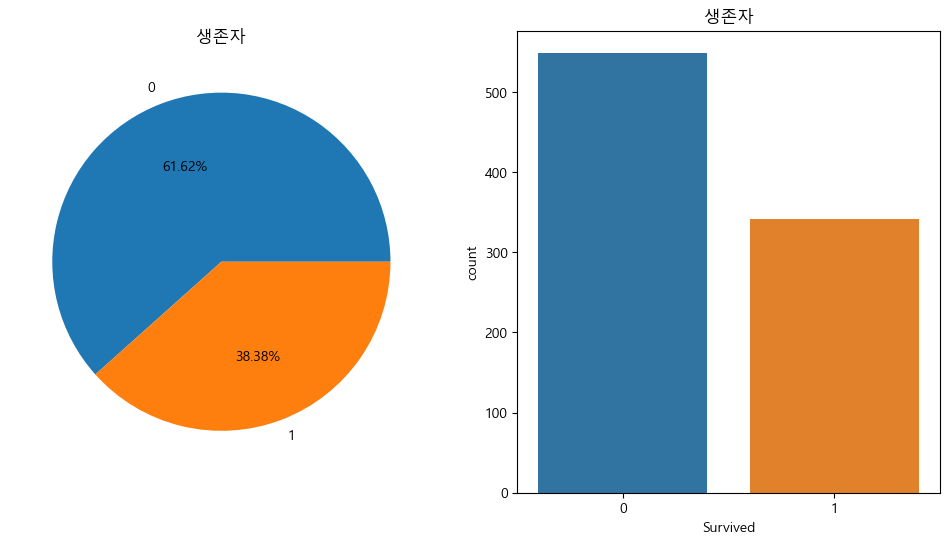

In [33]:
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

f,ax=plt.subplots(1,2,figsize=(12,6))

df['Survived'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('생존자')

ax[0].set_ylabel('')

sns.countplot(x=df['Survived'],data=df,ax=ax[1])

ax[1].set_title('생존자')

plt.show()



<Axes: >

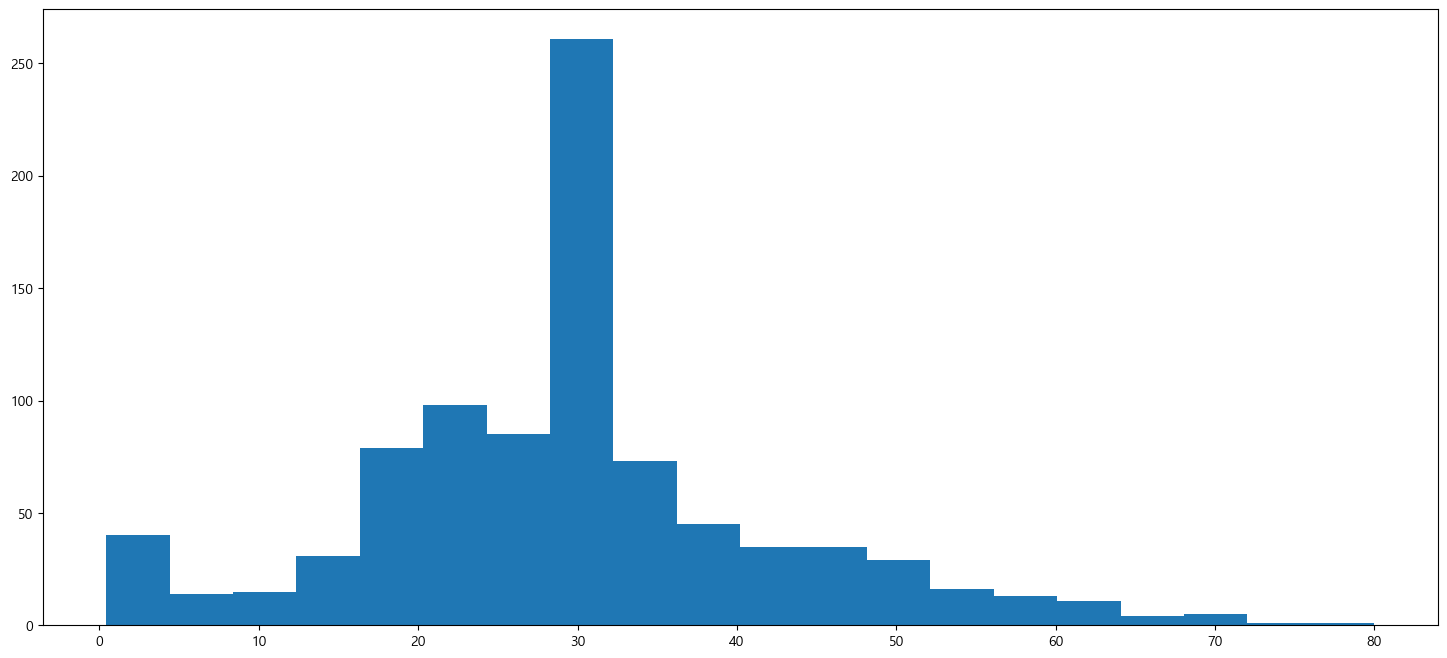

In [5]:
#승객들의 연령 분포

df['Age'].hist(bins=20,figsize=(18,8),grid=False)

In [6]:
#객실등급별 통계

df.groupby('Pclass1').mean()

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


In [7]:
df.groupby('Pclass2').mean()

,Survived,Pclass1,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass2,,,,,,,,,
0,0.360679,0.305516,0.694484,0.663366,0.336634,29.726082,0.554455,0.381895,35.208073
1,0.472826,0.000000,0.000000,0.586957,0.413043,29.884946,0.402174,0.380435,20.662183


In [8]:
df.groupby('Pclass3').mean()



,Survived,Pclass1,Pclass2,male,female,Age,SibSp,Parch,Fare
Pclass3,,,,,,,,,
0,0.557500,0.54,0.46,0.575000,0.425000,33.775625,0.410000,0.367500,54.948135
1,0.242363,0.00,0.00,0.706721,0.293279,26.486599,0.615071,0.393075,13.675550


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


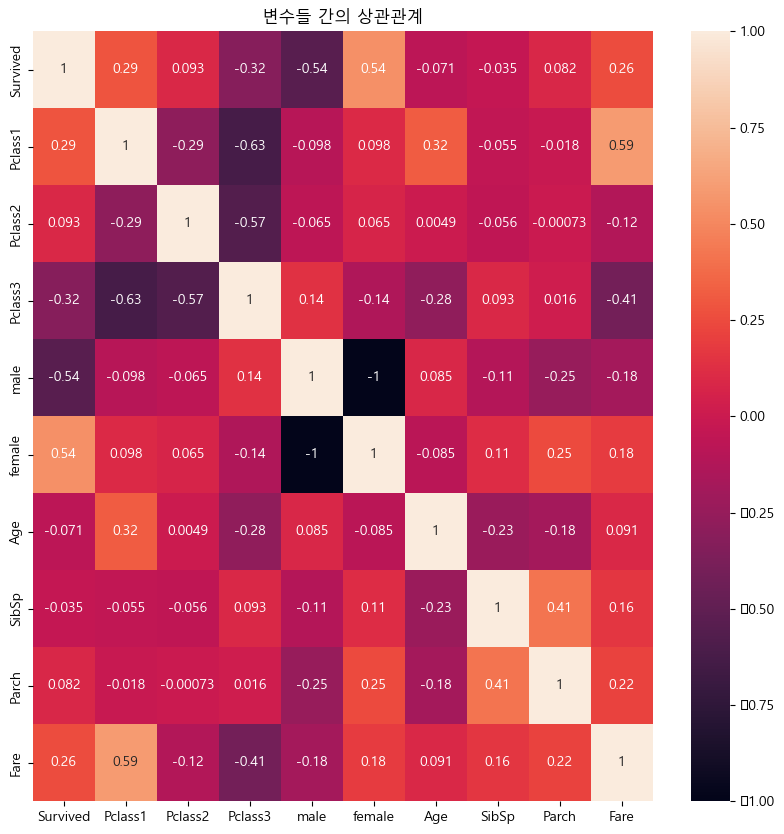

In [9]:
#상관관계 분석

plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True, linecolor="white")

plt.title('변수들 간의 상관관계')

plt.show()

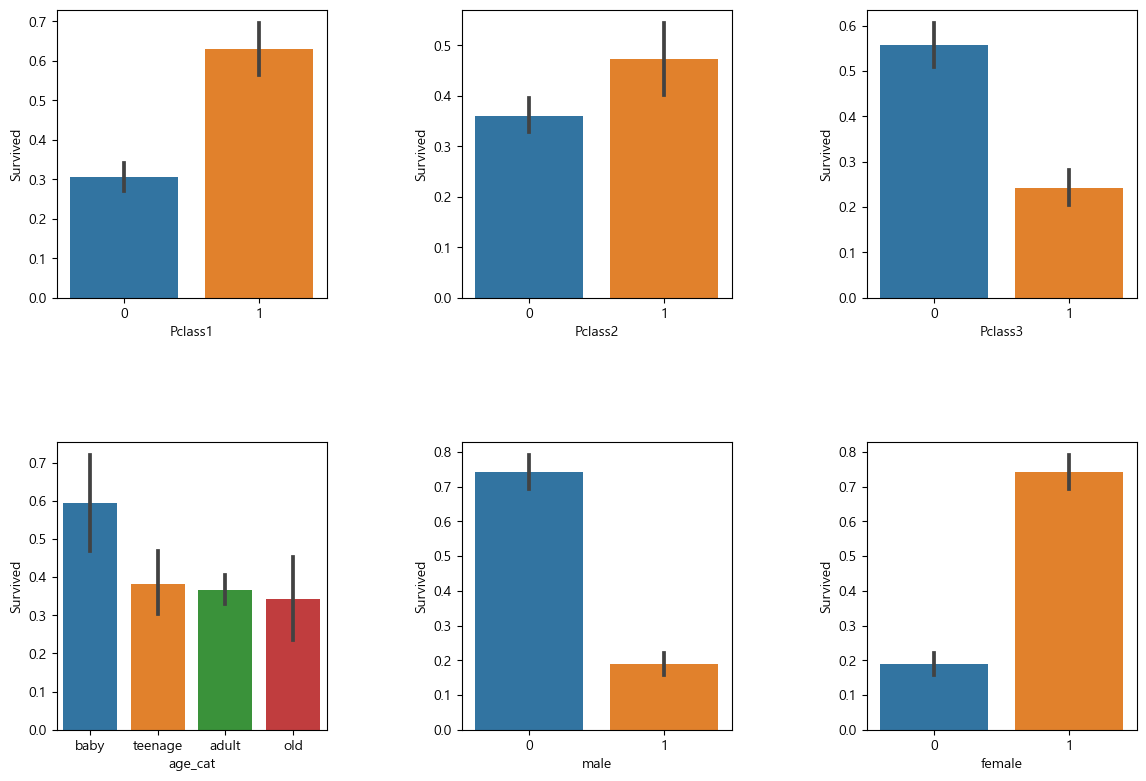

In [10]:
#연령대를 나눠서 분석

df['age_cat'] = pd.cut(df['Age'], bins=[0, 10, 20, 50, 100], include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])

plt.figure(figsize=[12,8])

plt.subplot(231)

#막대 위의 세로선은 오차범위를 의미함(기본값은 ci=95)

sns.barplot(x='Pclass1', y='Survived', data=df)

plt.subplot(232)

sns.barplot(x='Pclass2', y='Survived', data=df)

plt.subplot(233)

sns.barplot(x='Pclass3', y='Survived', data=df)

plt.subplot(234)

sns.barplot(x='age_cat', y='Survived', data=df)

plt.subplot(235)

sns.barplot(x='male',y='Survived',data=df)

plt.subplot(236)

sns.barplot(x='female',y='Survived',data=df)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)

plt.show()

#1등석,2등석인 경우 생존률이 높음, 3등석은 생존률이 낮음

#baby와 female의 생존률이 높음

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10724\541843227.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10724\541843227.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)


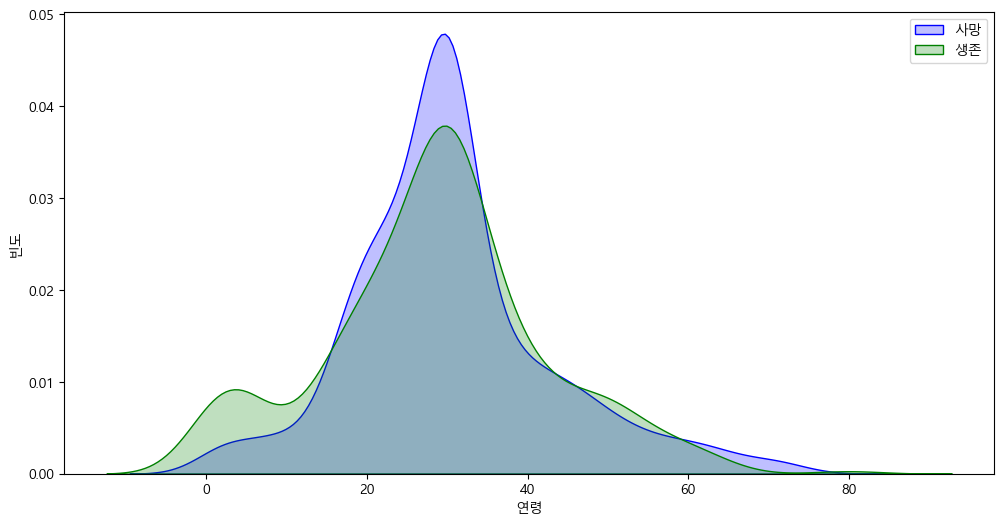

In [11]:
#나이 분포 곡선(어린아이들의 생존률이 상대적으로 높음)

f,ax = plt.subplots(figsize=(12,6))

#커널 밀도(kernel density) 그래프 : 히스토그램보다 부드러운 형태의 분포 곡선

g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)

g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)

g.set_xlabel("연령")

g.set_ylabel("빈도")

g.legend(["사망","생존"])



In [12]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
train_cols=df.columns[1:-1]

X=df[train_cols] #독립변수

y=df['Survived'] #종속변수

In [14]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

In [15]:
X = X_samp[train_cols] # 독립변수

y = y_samp["Survived"]



In [16]:
from sklearn.model_selection import train_test_split

#데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [17]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
_________________________________________________________________


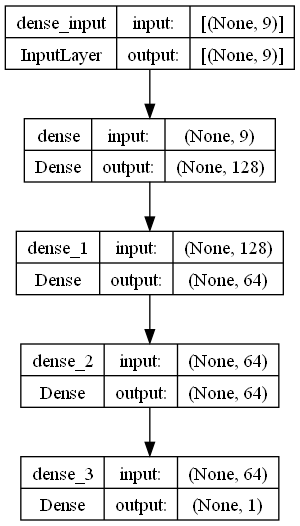

In [19]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

<Axes: >

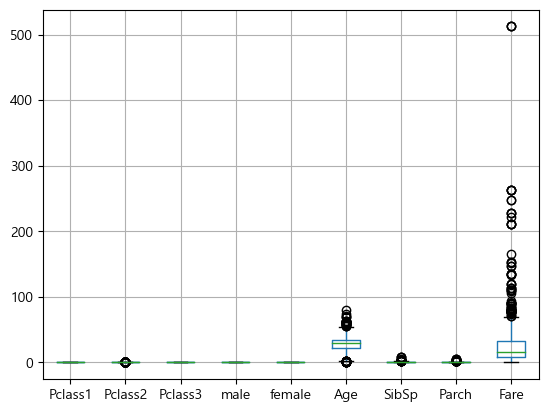

In [20]:
X_train.boxplot()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)

# 넘파이 배열로 바뀜

# 넘파이 배열 => 데이터프레임

X_train_scaled=pd.DataFrame(X_train_scaled)

X_test_scaled=pd.DataFrame(X_test_scaled)

<Axes: >

C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


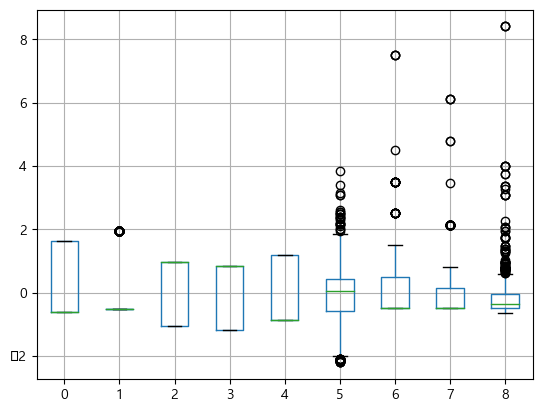

In [22]:
X_train_scaled.boxplot()

In [24]:
from joblib import dump

dump(scaler, 'c:/data/titanic/scaler.model', compress=True)

['c:/data/titanic/scaler.model']

Epoch 1/500
18/18 [==============================] - 1s 6ms/step - loss: 0.2186 - accuracy: 0.7148
Epoch 2/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1574 - accuracy: 0.7916
Epoch 3/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1454 - accuracy: 0.7843
Epoch 4/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1378 - accuracy: 0.8080
Epoch 5/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1347 - accuracy: 0.8117
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.8172
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.8208
Epoch 8/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.8172
Epoch 9/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1325 - accuracy: 0.8227
Epoch 10/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1336 - accuracy: 0.8099
Epoch 11/

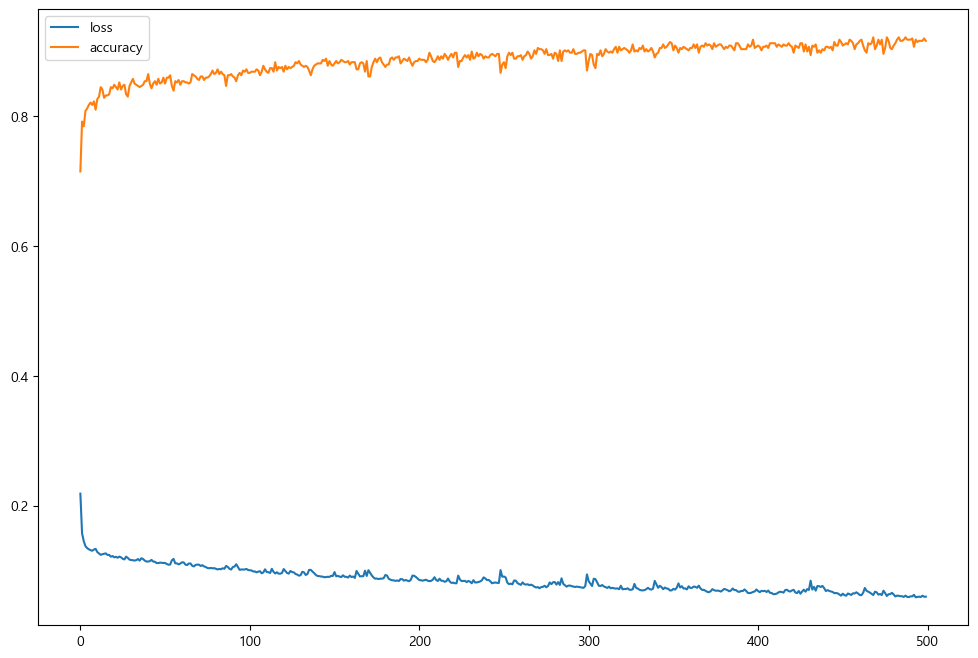

In [25]:
#모델 학습

hist = model.fit(X_train_scaled, y_train, epochs=500)

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])

plt.plot(hist.history['accuracy'])

plt.legend(['loss','accuracy'])

plt.show()

In [26]:
# 7. 모델 평가

scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

18/18 [==============================] - 0s 4ms/step - loss: 0.0562 - accuracy: 0.9287
[0.05616424232721329, 0.9287019968032837]
accuracy: 92.87%


In [27]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

5/5 [==============================] - 0s 4ms/step - loss: 0.1864 - accuracy: 0.7591
[0.18642616271972656, 0.7591241002082825]
accuracy: 75.91%


In [28]:
#1등석, 2등석, 3등석, 남성여부, 여성여부, 나이, 형제자매, 부모자녀, 요금

#3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금50

person1 = [[0, 0, 1, 1, 0, 19, 2, 0, 50]]

#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30

person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

#2등석, 여성, 40세, 형제자매1, 부모자녀1, 요금70

person3 = [[0, 1, 0, 0, 1, 40, 1, 1, 70]]

#스케일링을 해야 할 경우

person1=scaler.transform(person1)

person2=scaler.transform(person2)

person3=scaler.transform(person3)

print(model.predict(person1))

print(model.predict(person2))

print(model.predict(person3))

1/1 [==============================] - 0s 85ms/step
[[0.00011006]]
1/1 [==============================] - ETA: 0s

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
[[1.]]
1/1 [==============================] - 0s 22ms/step
[[1.]]


In [29]:
#모형을 지정한 디렉토리에 저장

model.save('c:/data/titanic/titanic.h5')

#netron 다운로드 및 테스트  

#https://github.com/lutzroeder/netron

### OZONE

In [16]:
import pandas as pd

# csv 파일을 로딩

df = pd.read_csv("./DATA/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

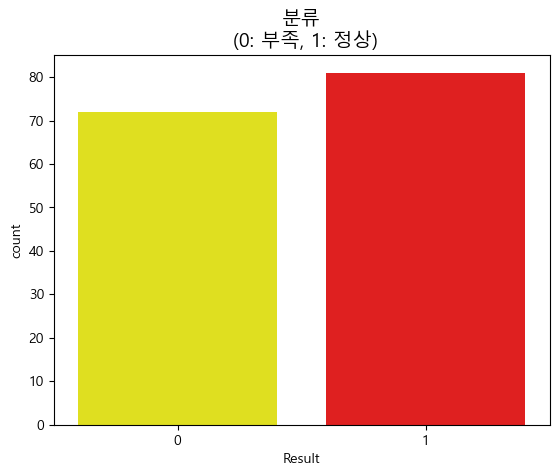

In [18]:
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt

#한글 처리를 위해 폰트 설정

font_name = font_manager.FontProperties(\

fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

import seaborn as sns

colors = ["yellow", "red"]

sns.countplot(x='Result', data=df, palette=colors)

plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

#불균형 데이터셋

###################

In [19]:
#불균형 데이터셋

train_cols=['Solar.R', 'Wind', 'Temp']
X = df[train_cols]  
y = df['Result']

In [20]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


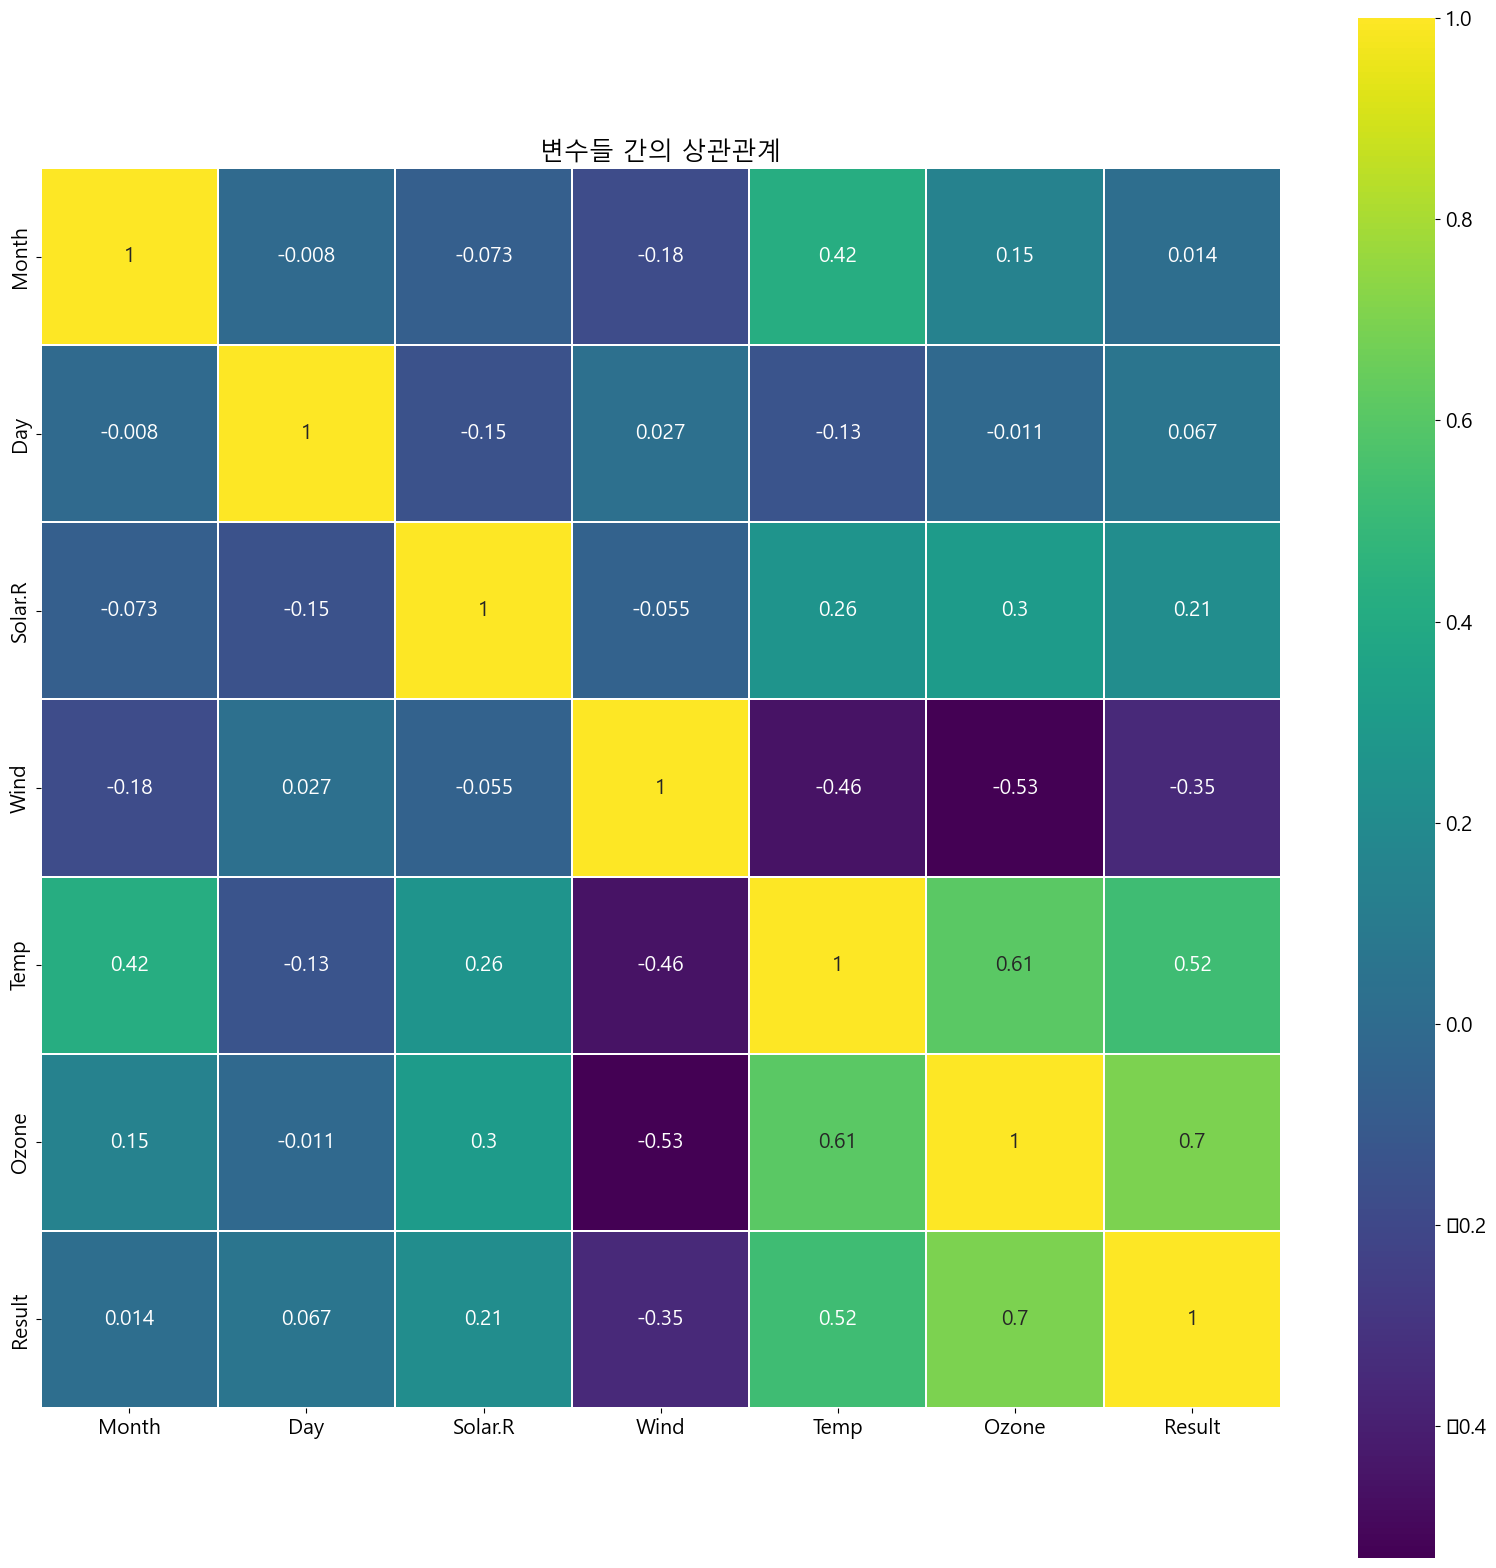

In [21]:
X = X_samp[train_cols]
y = y_samp['Result']

df_samp["Result"].value_counts()

#상관계수 행렬 그래프

plt.figure(figsize=(20, 20))

plt.rc('font', size=15)

sns.heatmap(df.corr(), linewidths=0.01, square=True,

            annot=True, cmap=plt.cm.viridis, linecolor="white")

plt.title('변수들 간의 상관관계')

plt.show()

In [22]:
from sklearn.model_selection import train_test_split

#데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y,

    stratify=y,test_size=0.2, random_state=7)

In [23]:
from keras.models import Sequential

from keras.layers import Dense

# 3. 모델 구성

model = Sequential(name='mymodel')

# 노드개수, 독립변수 개수, 활성화함수 relu

model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu',name='hidden-1'))

model.add(Dense(64, activation='relu',name='hidden-2'))

model.add(Dense(64, activation='relu',name='hidden-3'))

# sigmoid : 0.0~1.0

model.add(Dense(1, activation='sigmoid',name='output'))

# 4. 모델 학습과정 설정

model.compile(loss='mse', optimizer='adam',

              metrics=['accuracy'])

### 신경망 교차검증

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

np.random.seed(0)

number_of_features = 100

features, target = make_classification(n_samples = 10000,

                              n_features = number_of_features,
                              n_informative = 3,
                              n_redundant = 0,
                              n_classes = 2,
                              weights = [.5, .5],
                              random_state = 0)

In [4]:
from scikeras.wrappers import KerasClassifier



def create_network():

    network =Sequential()

    network.add(Dense(units=16, activation="relu", input_shape=(number_of_features,)))

    network.add(Dense(units=16, activation="relu"))

    network.add(Dense(units=1, activation="sigmoid"))

    network.compile(loss="binary_crossentropy", 

                    optimizer="rmsprop", 

                    metrics=["accuracy"])

    return network

# binary_cross entropy - sigmoid
# category_cross entropy - softmax

In [6]:
neural_network = KerasClassifier(model=create_network,

                                 epochs=10,

                                 batch_size=100,

                                 verbose=0)

cross_val_score(neural_network, features, target, cv=3)

array([0.76470588, 0.51515152, 0.66666667])

In [7]:
# 2. 하이퍼 파라미터 튜닝

#시간이 오래 걸림

from sklearn.model_selection import GridSearchCV

np.random.seed(0)

number_of_features = 10

features, target = make_classification(n_samples = 100,

                              n_features = number_of_features,

                              n_informative = 3,

                              n_redundant = 0,

                              n_classes = 2,

                              weights = [.5, .5],  # 레이블 개수 가중치?

                              random_state = 0)

In [8]:
def create_network(optimizer="rmsprop"):

    network =Sequential()

    network.add(Dense(units=16,

                         activation="relu",

                         input_shape=(number_of_features,)))

    network.add(Dense(units=16, activation="relu"))

    network.add(Dense(units=1, activation="sigmoid"))

    network.compile(loss="binary_crossentropy",

                    optimizer=optimizer, 

                    metrics=["accuracy"]) 

    return network

In [9]:
neural_network = KerasClassifier(model=create_network, verbose=0)

In [11]:
epochs = [5, 10]

batches = [5, 10, 100]

optimizers = ["rmsprop", "adam"]

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)


# 나머지 epochs, batches는 KerasClassifier의 디폴트 매개변수로 자동 연결)
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

grid_result = grid.fit(features, target)

In [12]:
grid_result.best_params_

{'batch_size': 10, 'epochs': 10, 'optimizer': 'adam'}

In [13]:
grid_result.cv_results_['mean_test_score']

array([0.45, 0.61, 0.59, 0.64, 0.63, 0.55, 0.59, 0.66, 0.57, 0.54, 0.56,
       0.55])

In [14]:
max(grid_result.cv_results_['mean_test_score'])

0.6599999999999999

In [15]:
grid_result.best_estimator_

KerasClassifier(
	model=<function create_network at 0x00000150822723A0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)